\？表示很难有思路

\!表示重看一遍思路

Re表示重做

排序：`std::sort(g.begin(), g.end(), [](int a, int b){return a > b;}); // #include <algorithm> `

求和：`accumulate(candies.begin(), candies.end(), 0); // 0是初始值 `

# 贪心算法

## 455. 分发饼干
假设你是一位很棒的家长，想要给你的孩子们一些小饼干。但是，每个孩子最多只能给一块饼干。

对每个孩子 i，都有一个胃口值 g[i]，这是能让孩子们满足胃口的饼干的最小尺寸；并且每块饼干 j，都有一个尺寸 s[j] 。如果 s[j] >= g[i]，我们可以将这个饼干 j 分配给孩子 i ，这个孩子会得到满足。你的目标是尽可能满足越多数量的孩子，并输出这个最大数值。
```CPP
#include <algorithm>

class Solution {
public:
    int findContentChildren(vector<int>& g, vector<int>& s) {
        int index_g{0};
        int index_s{0};
        // 分别对两个数组排序
        std::sort(g.begin(), g.end());
        std::sort(s.begin(), s.end());
        // 循环饼干数组
        int temp_s{0};
        while(index_g<g.size()&&index_s<s.size()){
            if(s[index_s]>=g[index_g]){
                index_g++;index_s++;
            }
            else{
                index_s++;
            }
        }
        return index_g;
    }
};
```

## ！135. 分发糖果
n 个孩子站成一排。给你一个整数数组 ratings 表示每个孩子的评分。

你需要按照以下要求，给这些孩子分发糖果：

每个孩子至少分配到 1 个糖果。
相邻两个孩子评分更高的孩子会获得更多的糖果。
请你给每个孩子分发糖果，计算并返回需要准备的 最少糖果数目 。
```CPP
class Solution {
public:
    int candy(vector<int>& ratings) {
        // 给予所有人一个糖果
        vector<int> candies(ratings.size() ,1);
        // 从左往右遍历，只判断右比左大，根据排名给予更多糖果
        for(int i{0};i<ratings.size()-1;i++){
            if(ratings[i+1]>ratings[i]){
                candies[i+1]=candies[i]+1;
            }
        }
        // 从右往左遍历，只判断左比右大，根据排名给予更多糖果
        for(int i=ratings.size()-1;i>=1;i--){
            if(ratings[i-1]>ratings[i]&&candies[i-1]<=candies[i]){
                candies[i-1]=candies[i]+1;
            }
        }
        return accumulate(candies.begin(), candies.end(), 0);
    }
};
```

## 435. 无重叠区间
给定一个区间的集合 intervals ，其中 intervals[i] = [starti, endi] 。返回 需要移除区间的最小数量，使剩余区间互不重叠 。
```CPP
class Solution {
public:
    int eraseOverlapIntervals(vector<vector<int>>& intervals) {
        // 选择从start排序还是end排序，若选择start排序则无法衡量区间的大小
        // 1. 按照end排序 2. 遍历筛选，优先选择小且不重合的end
        sort(intervals.begin(),intervals.end(),[](vector<int> &a, vector<int> &b)
        {return a[1]<b[1];});
        int n = intervals.size();
        int remove_num{0};
        int former_end{intervals[0][1]};  // 维护上一个没被丢弃的向量end
        for(int i=1;i<n;++i){
            if(intervals[i][0]<former_end){  //不重叠
                ++remove_num;
            }
            else{
                former_end = intervals[i][1];
            }
        }
        return remove_num;
    }
};
```

## （Re）763. 划分字母区间
给你一个字符串 s 。我们要把这个字符串划分为尽可能多的片段，同一字母最多出现在一个片段中。

注意，划分结果需要满足：将所有划分结果按顺序连接，得到的字符串仍然是 s 。

返回一个表示每个字符串片段的长度的列表。
```CPP
class Solution {
public:
    vector<int> partitionLabels(string s) {
        /*  1. 检查最后一位数出现的索引列表
            2. 用end变量表示当前选择的范围，
        */
        int last_index[26]{0};
        for(int i{0};i<s.length();++i){
            last_index[s[i]-'a']=i;
        }
        int start{0}, end{last_index[s[0]-'a']};
        vector<int> o;
        for(int i{1};i<s.length();++i){
            int tp = s[i]-'a';
            if(i>end){
                o.push_back(end-start+1);
                start=i+1;
                end=last_index[s[i+1]-'a'];
                continue;
            }
            end=max(last_index[tp],end);
        }
        return o;
    }
};
```

## 122. 买卖股票的最佳时机 II
**难点在于想到：只要比今天高就卖出**

给你一个整数数组 prices ，其中 prices[i] 表示某支股票第 i 天的价格。

在每一天，你可以决定是否购买和/或出售股票。你在任何时候 最多 只能持有 一股 股票。你也可以先购买，然后在 同一天 出售。

返回 你能获得的 最大 利润 。
```CPP
class Solution {
public:
    int maxProfit(vector<int>& prices) {
        // 1. 只要比今天高就卖出 2. 遍历时维护最低价即可
        int cur_price{prices[0]};
        int o{0};
        for(int i{1};i<prices.size();++i){
            if(prices[i]>cur_price){
                o=o+prices[i]-cur_price;
            }
            cur_price=prices[i];
        }
        return o;
    }
};
```

## 2！665. 非递减数列
给你一个长度为 n 的整数数组 nums ，请你判断在 最多 改变 1 个元素的情况下，该数组能否变成一个非递减数列。

我们是这样定义一个非递减数列的： 对于数组中任意的 i (0 <= i <= n-2)，总满足 nums[i] <= nums[i + 1]。
```CPP
class Solution {
public:
    bool checkPossibility(vector<int>& nums) {
        // 顺序不正确时的两种处理方式：
        // 1. 将当前值变小（与前一个值相等）默认，若条件不符合则采用方法2，在下一循环进行检查
        // 2. 将当前值变大（与后一个值相等）
        int n=nums.size();
        bool count=false;
        if(n==1) return true;
        for(int i{0};i<n-1;++i){
            if(nums[i]>nums[i+1]){
                if(count) return false; // 若修改超过一次，则返回false
                else{
                    if(i==(n-2)){
                        if(count) return false;
                        else return true;
                    }
                    if(i==0){
                        nums[0]=nums[1];
                    }
                    else{
                        if(nums[i-1]>nums[i+1]){
                            // 修改nums[i+1]=nums[i]
                            nums[i+1]=nums[i];
                        }
                        else{
                            nums[i]=nums[i-1];
                        }
                    }
                    count=true;
                }
            }
        }
        return true;
    }
};
```

## 2！406. 根据身高重建队列
假设有打乱顺序的一群人站成一个队列，数组 people 表示队列中一些人的属性（不一定按顺序）。每个 people[i] = [hi, ki] 表示第 i 个人的身高为 hi ，前面 正好 有 ki 个身高大于或等于 hi 的人。

请你重新构造并返回输入数组 people 所表示的队列。返回的队列应该格式化为数组 queue ，其中 queue[j] = [hj, kj] 是队列中第 j 个人的属性（queue[0] 是排在队列前面的人）。
```CPP
class Solution {
public:
    vector<vector<int>> reconstructQueue(vector<vector<int>>& people) {
        /*  1. 按高度排序，同样身高按个数排序
            2. 循环,因为在列表里的均比当前高，所以直接右移选择位置即可
            people = [[7,0],[4,4],[7,1],[5,0],[6,1],[5,2]]
            people = [[7,0],[7,1],[6,1],[5,0],[5,2],[4,4]]
        */
        sort(people.begin(),people.end(),[](vector<int> &a, vector<int> &b){
            return a[0]>b[0] || (a[0]==b[0]&&a[1]<b[1]);
            });
        vector<vector<int>> o;
        o.push_back(people[0]);
        for(int i{1};i<people.size();++i){
            o.insert(o.begin()+people[i][1],people[i]);
        }
        return o;
    }
};
```

## 88. 合并两个有序数组
给你两个按 非递减顺序 排列的整数数组 nums1 和 nums2，另有两个整数 m 和 n ，分别表示 nums1 和 nums2 中的元素数目。

请你 合并 nums2 到 nums1 中，使合并后的数组同样按 非递减顺序 排列。

注意：最终，合并后数组不应由函数返回，而是存储在数组 nums1 中。为了应对这种情况，nums1 的初始长度为 m + n，其中前 m 个元素表示应合并的元素，后 n 个元素为 0 ，应忽略。nums2 的长度为 n 。
```CPP
class Solution {
public:
    void merge(vector<int>& nums1, int m, vector<int>& nums2, int n) {
        // 从nums1的末尾从后往前排
        int a{m-1},b{n-1},cur{m+n-1};
        while(a>-1||b>-1){
            if(a==-1){
                for(int i{0};i<=b;++i){
                    // cout<<"1";
                    nums1[i]=nums2[i];
                    // cout<<"2";
                }
                break;
            }
            if(b==-1){
                break;
            }
            if(nums1[a]>nums2[b]){
                nums1[cur]=nums1[a];
                --a;
                --cur;
            }
            else{
                nums1[cur]=nums2[b];
                --b;
                --cur;
            }
        }
    }
};
```

## 142. 环形链表 II
给定一个链表的头节点  head ，返回链表开始入环的第一个节点。 如果链表无环，则返回 null。

如果链表中有某个节点，可以通过连续跟踪 next 指针再次到达，则链表中存在环。 为了表示给定链表中的环，评测系统内部使用整数 pos 来表示链表尾连接到链表中的位置（索引从 0 开始）。如果 pos 是 -1，则在该链表中没有环。注意：pos 不作为参数进行传递，仅仅是为了标识链表的实际情况。

不允许修改 链表。
```CPP
class Solution {
public:
    ListNode *detectCycle(ListNode *head) {
        // 快慢指针法
        ListNode *slow{head},*fast{head};
        while(fast->next!=nullptr&&fast!=nullptr){
            fast=fast->next->next;
            slow=slow->next;
            if(fast==slow){
                // 将fast移动至开头
                fast=head;
                while(fast!=slow){
                    fast=fast->next;
                    slow=slow->next;
                }
                return fast;
            }
        }
        return nullptr;
    }
};
```

## 69. x 的平方根 
**注意**：
1. 0和1的情况 
2. mid>x/mid而不是mid\*mid防止溢出

给你一个非负整数 x ，计算并返回 x 的 算术平方根 。

由于返回类型是整数，结果只保留 整数部分 ，小数部分将被 舍去 。

注意：不允许使用任何内置指数函数和算符，例如 pow(x, 0.5) 或者 x ** 0.5 。
```CPP
class Solution {
public:
    int mySqrt(int x) {
        if(x==0||x==1){
            return x;
        }
        int start{0},end{x};
        while(start<end){
            int mid=(start+end)/2;
            // cout<<mid;
            if(mid>x/mid){
                end=mid;
            }
            else{
                if(start==mid){
                    return mid;
                }
                start=mid;
            }
        }
        return start;
        // [07) [03) [13) [23)
    }
};
```

# 双指针

## (Re)81. 搜索旋转排序数组 II
已知存在一个按非降序排列的整数数组 nums ，数组中的值不必互不相同。

在传递给函数之前，nums 在预先未知的某个下标 k（0 <= k < nums.length）上进行了 旋转 ，使数组变为 [nums[k], nums[k+1], ..., nums[n-1], nums[0], nums[1], ..., nums[k-1]]（下标 从 0 开始 计数）。例如， [0,1,2,4,4,4,5,6,6,7] 在下标 5 处经旋转后可能变为 [4,5,6,6,7,0,1,2,4,4] 。

给你 旋转后 的数组 nums 和一个整数 target ，请你编写一个函数来判断给定的目标值是否存在于数组中。如果 nums 中存在这个目标值 target ，则返回 true ，否则返回 false 。

你必须尽可能减少整个操作步骤。
```CPP
class Solution {
public:
    bool search(vector<int>& nums, int target) {
        // 二分查找
        return binarySearch(nums,target,0,nums.size()-1);
    }
    bool binarySearch(vector<int>& nums, int target, int left, int right) {
        if(left>right) return false;
        if(left==right) return nums[left]==target;
        int mid=(left+right)/2;
        int mid_val=nums[mid];
        if(mid_val==target){
            return true;
        }
        if(mid_val<nums[left]){
            if(target>mid_val&&target<nums[left]) return binarySearch(nums,target,mid+1,right);
            else return binarySearch(nums,target,left,mid-1);
        }
        else{
            if(mid==left) return binarySearch(nums,target,mid+1,right);
            if(target<nums[left]){
                if(target>mid_val) return binarySearch(nums,target,mid+1,right);
                else return binarySearch(nums,target,left,mid-1);
            }
            else return binarySearch(nums,target,left,mid-1);
        }
    }
};
```

#  深广度优先搜索

## 695. 岛屿的最大面积
给你一个大小为 m x n 的二进制矩阵 grid 。

岛屿 是由一些相邻的 1 (代表土地) 构成的组合，这里的「相邻」要求两个 1 必须在 水平或者竖直的四个方向上 相邻。你可以假设 grid 的四个边缘都被 0（代表水）包围着。

岛屿的面积是岛上值为 1 的单元格的数目。

计算并返回 grid 中最大的岛屿面积。如果没有岛屿，则返回面积为 0 。
```CPP
class Solution {
public:
    int maxAreaOfIsland(vector<vector<int>>& grid) {
        // 对遍历到的节点深度优先搜索，遍历后设置为0
        int max_area{0};
        int m=grid.size(), n=grid[0].size();
        for(int i{0};i<m;++i){
            for(int j{0};j<n;++j){
                if(!grid[i][j]) continue;
                // 深度搜索
                int ta = findMaxArea(grid,i,j,m,n);
                if(ta>max_area) max_area=ta;
            }
        }
        return max_area;
    }
    int findMaxArea(vector<vector<int>>& grid, int i, int j, int& m, int &n){
        int ta{1};
        grid[i][j]=0;
        stack<pair<int,int>> s;
        s.push({i,j});
        // 递归寻找上下左右四个方向
        while(!s.empty()){
            auto tp = s.top();
            s.pop();
            if(tp.second+1<n&&grid[tp.first][tp.second+1]){
                grid[tp.first][tp.second+1]=0;
                s.push(pair<int,int>{tp.first,tp.second+1});
                ++ta;
            }
            if(tp.second-1>=0&&grid[tp.first][tp.second-1]){
                grid[tp.first][tp.second-1]=0;
                s.push(pair<int,int>{tp.first,tp.second-1});
                ++ta;
            }
            if(tp.first+1<m&&grid[tp.first+1][tp.second]){
                grid[tp.first+1][tp.second]=0;
                s.push(pair<int,int>{tp.first+1,tp.second});
                ++ta;
            }
            if(tp.first-1>=0&&grid[tp.first-1][tp.second]){
                grid[tp.first-1][tp.second]=0;
                s.push(pair<int,int>{tp.first-1,tp.second});
                ++ta;
            }
        }
        return ta;
    }
};
```

## (Re)547. 省份数量
**使用向量visited记录是否访问过**

有 n 个城市，其中一些彼此相连，另一些没有相连。如果城市 a 与城市 b 直接相连，且城市 b 与城市 c 直接相连，那么城市 a 与城市 c 间接相连。

省份 是一组直接或间接相连的城市，组内不含其他没有相连的城市。

给你一个 n x n 的矩阵 isConnected ，其中 isConnected[i][j] = 1 表示第 i 个城市和第 j 个城市直接相连，而 isConnected[i][j] = 0 表示二者不直接相连。

返回矩阵中 省份 的数量。
```CPP
class Solution {
public:
    int findCircleNum(vector<vector<int>>& isConnected) {
        // 遍历j<i避免重复
        // 深度搜索并将与其相连的置0
        /*
        1 1 0
        1 1 0
        0 0 1
        */
        stack<int> s;
        int num{0};
        vector<bool> visited(isConnected.size(), false);
        for(int i{0};i<isConnected.size();++i){
            for(int j{0};j<i;++j){
                if(isConnected[i][j]==1){
                    ++num;
                    cout<<i<<"\t"<<j<<"\n";
                    s.push(i);
                    s.push(j);
                    visited[i]=true;
                    visited[j]=true;
                    isConnected[i][j]=2;
                    while(!s.empty()){
                        int t{s.top()};
                        s.pop();
                        // 找到与该城市相连的城市并置0
                        for(int k{0};k<t;++k){
                            if(isConnected[t][k]){
                                isConnected[t][k]=2;
                                visited[k]=true;
                                s.push(k);
                            }
                        }
                    }
                }
            }
        }
        for(int i{0};i<isConnected.size();++i){
            if(!visited[i]) ++num;
        }
        return num;
    }
};
```

## (Re)417. 太平洋大西洋水流问题
有一个 m × n 的矩形岛屿，与 太平洋 和 大西洋 相邻。 “太平洋” 处于大陆的左边界和上边界，而 “大西洋” 处于大陆的右边界和下边界。

这个岛被分割成一个由若干方形单元格组成的网格。给定一个 m x n 的整数矩阵 heights ， heights[r][c] 表示坐标 (r, c) 上单元格 高于海平面的高度 。

岛上雨水较多，如果相邻单元格的高度 小于或等于 当前单元格的高度，雨水可以直接向北、南、东、西流向相邻单元格。水可以从海洋附近的任何单元格流入海洋。

返回网格坐标 result 的 2D 列表 ，其中 result[i] = [ri, ci] 表示雨水从单元格 (ri, ci) 流动 既可流向太平洋也可流向大西洋 。

**思路1：采用深度优先，两块分开搜索，从边上开始深度搜索，最后进行统计**
```CPP
static const int dirs[4][2] = {{-1, 0}, {1, 0}, {0, -1}, {0, 1}};

class Solution {
public:
    vector<vector<int>> heights;

    void dfs(int row, int col, vector<vector<bool>> & ocean) {
        int m = ocean.size();
        int n = ocean[0].size();
        if (ocean[row][col]) {   // 如果遍历过就不管了
            return;
        }
        ocean[row][col] = true;
        for (int i = 0; i < 4; i++) {
            int newRow = row + dirs[i][0], newCol = col + dirs[i][1];
            if (newRow >= 0 && newRow < m && newCol >= 0 && newCol < n && heights[newRow][newCol] >= heights[row][col]) {
                dfs(newRow, newCol, ocean);
            }
        }
    }

    vector<vector<int>> pacificAtlantic(vector<vector<int>>& heights) {
        this->heights = heights;
        int m = heights.size();
        int n = heights[0].size();
        vector<vector<bool>> pacific(m, vector<bool>(n, false));
        vector<vector<bool>> atlantic(m, vector<bool>(n, false));

        for (int i = 0; i < m; i++) {
            dfs(i, 0, pacific);
        }
        for (int j = 1; j < n; j++) {
            dfs(0, j, pacific);
        }
        for (int i = 0; i < m; i++) {
            dfs(i, n - 1, atlantic);
        }
        for (int j = 0; j < n - 1; j++) {
            dfs(m - 1, j, atlantic);
        }
        vector<vector<int>> result;
        for (int i = 0; i < m; i++) {
            for (int j = 0; j < n; j++) {
                if (pacific[i][j] && atlantic[i][j]) {
                    vector<int> cell;
                    cell.emplace_back(i);
                    cell.emplace_back(j);
                    result.emplace_back(cell);
                }
            }
        }
        return result;
    }
};

```
思路2：广度优先

```CPP
static const int dirs[4][2] = {{-1, 0}, {1, 0}, {0, -1}, {0, 1}};

class Solution {
public:
    vector<vector<int>> heights;
    // 广度优先
    void bfs(int row, int col, vector<vector<bool>> & ocean) {
        if (ocean[row][col]) {
            return;
        }
        int m = heights.size();
        int n = heights[0].size();
        ocean[row][col] = true;
        queue<pair<int, int>> qu;
        qu.emplace(row, col);
        while (!qu.empty()) {
            auto [row, col] = qu.front();
            qu.pop();
            for (int i = 0; i < 4; i++) {
                int newRow = row + dirs[i][0], newCol = col + dirs[i][1];
                if (newRow >= 0 && newRow < m && newCol >= 0 && newCol < n && heights[newRow][newCol] >= heights[row][col] && !ocean[newRow][newCol]) {
                    ocean[newRow][newCol] = true;
                    qu.emplace(newRow, newCol);
                }
            }
        }
    }

    vector<vector<int>> pacificAtlantic(vector<vector<int>>& heights) {
        this->heights = heights;
        int m = heights.size();
        int n = heights[0].size();
        vector<vector<bool>> pacific(m, vector<bool>(n, false));
        vector<vector<bool>> atlantic(m, vector<bool>(n, false));

        for (int i = 0; i < m; i++) {
            bfs(i, 0, pacific);
        }
        for (int j = 1; j < n; j++) {
            bfs(0, j, pacific);
        }
        for (int i = 0; i < m; i++) {
            bfs(i, n - 1, atlantic);
        }
        for (int j = 0; j < n - 1; j++) {
            bfs(m - 1, j, atlantic);
        }
        vector<vector<int>> result;
        for (int i = 0; i < m; i++) {
            for (int j = 0; j < n; j++) {
                if (pacific[i][j] && atlantic[i][j]) {
                    vector<int> cell;
                    cell.emplace_back(i);
                    cell.emplace_back(j);
                    result.emplace_back(cell);
                }
            }
        }
        return result;
    }
};

```

# 动态规划

## 542. 01 矩阵
给定一个由 0 和 1 组成的矩阵 mat ，请输出一个大小相同的矩阵，其中每一个格子是 mat 中对应位置元素到最近的 0 的距离。

两个相邻元素间的距离为 1 。

**法1：广度优先**
```CPP
class Solution {
public:
    vector<int> tp{-1,0,1,0,-1};
    vector<vector<int>> updateMatrix(vector<vector<int>>& mat) {
        // 思路1：广度优先，将遍历到的0放入队列，然后按层级遍历其周围点，距离逐渐+1
        int m=mat.size(),n=mat[0].size();
        vector<vector<bool>> is_visited(m,vector<bool>(n,false));
        vector<vector<int>> o(m,vector<int>(n,0));
        queue<pair<int,int>> q;
        // 首先找到所有的0
        for(int i{0};i<m;++i){
            for(int j{0};j<n;++j){
                if(!mat[i][j]){
                    q.emplace(i,j);
                    is_visited[i][j]=true;
                }
            }
        }
        // 广度优先
        while(!q.empty()){
            auto [a,b] = q.front();
            q.pop();
            for(int i{0};i<4;++i){
                int c{a+tp[i]},d{b+tp[i+1]};
                //在边界内且没访问过
                if(c>-1&&c<m&&d>-1&&d<n&&!is_visited[c][d]){
                    o[c][d]=o[a][b]+1; // 赋值为最近点距离+1
                    is_visited[c][d]=true;
                    q.emplace(c,d);  // 入队列
                }
            }
        }
        return o;
    }
};
```

## 221. 最大正方形
在一个由 '0' 和 '1' 组成的二维矩阵内，找到只包含 '1' 的最大正方形，并返回其面积。

**思路有问题，直接用DP即可，正方形严格遵守三个点的规则，而我用的DP+广度，时间没有通过**

```CPP
class Solution {
public:
    vector<int> tp{0,1,1,0};
    int maximalSquare(vector<vector<char>>& matrix) {
        // 广度搜索，循环查找正(n)
        int m=matrix.size(),n=matrix[0].size();
        queue<pair<int,int>> q;
        vector<vector<int>> area(m,vector<int>(n,0));
        // 将为1的加入队列
        char c{'1'};
        int max{0};
        for(int i{0};i<m;++i){
            for(int j{0};j<n;++j){
                if(matrix[i][j]==c){
                    q.emplace(i,j);
                    area[i][j]=1;
                    max=1;
                }
            }
        }
        // 循环查找是否符合条件
        while(!q.empty()){
            auto [a,b]=q.front();
            q.pop();
            bool near{true};
            for(int i{0};i<3;++i){
                int c{a+tp[i]},d{b+tp[i+1]};
                if(c>=m||d>=n||area[c][d]==0){ 
                    near=false;
                    break;
                }
            }
            // 若周围三点均符合，则入队列
            if(near&&area[a+1][b]>=area[a+1][b+1]&&area[a][b+1]>=area[a+1][b+1]&&area[a][b]>=area[a+1][b+1]){
                q.emplace(a+1,b+1);
                // cout<<a+1<<" "<<b+1<<"\n";
                area[a+1][b+1]+=1;
                if(area[a+1][b+1]>max) max=area[a+1][b+1];
            }
        }
        return max*max;
    }
};
```

## ！279. 完全平方数

**非连续的DP问题，需要分解**

给你一个整数 n ，返回 和为 n 的完全平方数的最少数量 。

完全平方数 是一个整数，其值等于另一个整数的平方；换句话说，其值等于一个整数自乘的积。例如，1、4、9 和 16 都是完全平方数，而 3 和 11 不是。

```CPP
class Solution {
public:
    int numSquares(int n) {
        // dp[i]=1+min(dp[i-j*j]) j*j<i
        vector<int> dp(n+1,INT_MAX);
        dp[0]=0;
        for(int i{1};i<=n;++i){
            int minn{INT_MAX};
            for(int j{1};j*j<=i;++j){
                minn=min(minn,dp[i-j*j]);
            }
            dp[i]=1+minn;
        }
        return dp[n];
    }
};
```

## (Re)91. 解码方法
一条包含字母 A-Z 的消息通过以下映射进行了 编码 ：

'A' -> "1"
'B' -> "2"
...
'Z' -> "26"
要 解码 已编码的消息，所有数字必须基于上述映射的方法，反向映射回字母（可能有多种方法）。例如，"11106" 可以映射为：

"AAJF" ，将消息分组为 (1 1 10 6)
"KJF" ，将消息分组为 (11 10 6)
注意，消息不能分组为  (1 11 06) ，因为 "06" 不能映射为 "F" ，这是由于 "6" 和 "06" 在映射中并不等价。

给你一个只含数字的 非空 字符串 s ，请计算并返回 解码 方法的 总数 。

题目数据保证答案肯定是一个 32 位 的整数。

## ！1143. 最长公共子序列

**注意边界：需要用m+1**，若用m则初始化有问题

给定两个字符串 text1 和 text2，返回这两个字符串的最长 公共子序列 的长度。如果不存在 公共子序列 ，返回 0 。

一个字符串的 子序列 是指这样一个新的字符串：它是由原字符串在不改变字符的相对顺序的情况下删除某些字符（也可以不删除任何字符）后组成的新字符串。

例如，"ace" 是 "abcde" 的子序列，但 "aec" 不是 "abcde" 的子序列。
两个字符串的 公共子序列 是这两个字符串所共同拥有的子序列。
```CPP
class Solution {
public:
    int longestCommonSubsequence(string text1, string text2) {
        int m=text1.length(),n=text2.length();
        // 以二维数组代表第一个数组结尾和第二个数组结尾
        vector<vector<int>> dp(m+1,vector<int>(n+1,0));
        for(int i{1};i<=m;++i){
            for(int j{1};j<=n;++j){
                if(text1[i-1]==text2[j-1]){
                    dp[i][j]=dp[i-1][j-1]+1;
                }
                else{
                    dp[i][j]=max(dp[i-1][j],dp[i][j-1]);
                }
            }
        }
        return dp[m][n];
    }
};
```

## (Re)416. 分割等和子集

**与上相同注意边界：需要用m+1还是m**

给你一个 只包含正整数 的 非空 数组 nums 。请你判断是否可以将这个数组分割成两个子集，使得两个子集的元素和相等。
```CPP
class Solution {
public:
    bool canPartition(vector<int>& nums) {
        int sum=accumulate(nums.begin(),nums.end(),0);
        int n=nums.size();
        if(sum%2||n<2) return false;
        sum=sum/2;
        // dp[i][j]表示从前i个元素中选取子集能是否否等于j
        // dp[i][j]=true if dp[i-x][j-nums[i]]==true
        vector<vector<bool>> dp(n,vector<bool>(sum+1,false));
        for(int i{0};i<n;++i){
            dp[i][0]=true;
        }
        for(int i{1};i<n;++i){
            for(int j{1};j<=sum;++j){
                if((j-nums[i])>=0){
                    dp[i][j]=dp[i-1][j-nums[i]]|dp[i-1][j];
                }
                else{
                    dp[i][j]=dp[i-1][j];
                }
            }
        }
        // cout<<sum<<" "<<nums[0]<<"\n";
        // for(auto el:dp){
        //         cout << el <<"\n";
        // }
        return dp[n-1][sum];
    }
};
```
**减少数组到一维**
![image.png](attachment:image.png)
```CPP
class Solution {
public:
    bool canPartition(vector<int>& nums) {
        int n = nums.size();
        if (n < 2) {
            return false;
        }
        int sum = 0, maxNum = 0;
        for (auto& num : nums) {
            sum += num;
            maxNum = max(maxNum, num);
        }
        if (sum & 1) {
            return false;
        }
        int target = sum / 2;
        if (maxNum > target) {
            return false;
        }
        vector<int> dp(target + 1, 0);
        dp[0] = true;
        for (int i = 0; i < n; i++) {
            int num = nums[i];
            for (int j = target; j >= num; --j) {
                dp[j] |= dp[j - num];
            }
        }
        return dp[target];
    }
};
```

## 474. 一和零
给你一个二进制字符串数组 strs 和两个整数 m 和 n 。

请你找出并返回 strs 的最大子集的长度，该子集中 最多 有 m 个 0 和 n 个 1 。

如果 x 的所有元素也是 y 的元素，集合 x 是集合 y 的 子集 。

**无空间优化：**

```CPP
class Solution {
public:
    int findMaxForm(vector<string>& strs, int m, int n) {
        // dp[i][j]表示包含第i个元素时且0的个数为j个时的最大子集
        // j的取值为0-m，i的取值为0-i，
        int nv=strs.size();
        vector<vector<vector<int>>> dp(nv+1,vector<vector<int>>(m+1,vector<int>(n+1,0)));
        // dp[0]=vector<int>(m+1,0);

        for(int i{1};i<nv+1;++i){
            // 统计当前字符串中的0个数
            int n_zero{0};
            for(const char& el:strs[i-1]){
                if(el=='0') n_zero+=1;
            }
            int n_one=strs[i-1].length()-n_zero;
            for(int j{0};j<m+1;++j){
                for(int k{0};k<n+1;++k){
                    // 分包含当前元素和不包含当前元素
                    if(j-n_zero>=0&&k-n_one>=0){
                        dp[i][j][k]=max(dp[i-1][j][k],dp[i-1][j-n_zero][k-n_one]+1);
                    }
                    else{
                        dp[i][j][k]=dp[i-1][j][k];
                    }
                }
            }
        }
        return dp[nv][m][n];
    }
};
```

空间优化：
```CPP
class Solution {
public:
    int findMaxForm(vector<string>& strs, int m, int n) {
        // dp[i][j][k]表示包含第i个元素时且0的个数为j个时的最大子集
        // j的取值为0-m，i的取值为0-i，
        // 空间优化：去除第i层，从大到小遍历
        int nv=strs.size();
        vector<vector<int>> dp(m+1,vector<int>(n+1,0));
        // dp[0]=vector<int>(m+1,0);

        for(int i{1};i<nv+1;++i){
            // 统计当前字符串中的0个数
            int n_zero{0};
            for(const char& el:strs[i-1]){
                if(el=='0') n_zero+=1;
            }
            int n_one=strs[i-1].length()-n_zero;
            for(int j{m};j>=0;--j){
                for(int k{n};k>=0;--k){
                    // 分包含当前元素和不包含当前元素
                    if(j-n_zero>=0&&k-n_one>=0){
                        dp[j][k]=max(dp[j][k],dp[j-n_zero][k-n_one]+1);
                    }
                    else{
                        dp[j][k]=dp[j][k];
                    }
                }
            }
        }
        return dp[m][n];
    }
};
```

## 322. 零钱兑换
给你一个整数数组 coins ，表示不同面额的硬币；以及一个整数 amount ，表示总金额。

计算并返回可以凑成总金额所需的 最少的硬币个数 。如果没有任何一种硬币组合能组成总金额，返回 -1 。

你可以认为每种硬币的数量是无限的。
```CPP
class Solution {
public:
    int coinChange(vector<int>& coins, int amount) {
        if(!amount) return 0;
        // dp[i][j]表示包含第i个面额的硬币时且金额为j时的最小数量
        int m=coins.size();
        vector<int> dp(amount+1,-1);
        // 初始化，金额为0时数量为0
        dp[0]=0;

        for(int i{1};i<m+1;++i){
            int change{coins[i-1]};
            for(int j{amount};j>=0;--j){
                // 遍历所有数量
                int num{0},sub{j},minn{-1};
                while(sub>=0){
                    // cout<<num<<"\t"<<sub<<'\n';
                    if(dp[sub]==-1){
                        num++;
                        sub-=change;
                        continue;
                    }
                    if(minn==-1){
                        minn=dp[sub]+num;
                    }
                    else{
                        minn=min(dp[sub]+num,minn);
                    }
                    num++;
                    sub-=change;
                }
                dp[j]=minn;
            }
        }
        return dp[amount];
    }
};
```

## ？650. 只有两个键的键盘
最初记事本上只有一个字符 'A' 。你每次可以对这个记事本进行两种操作：

Copy All（复制全部）：复制这个记事本中的所有字符（不允许仅复制部分字符）。
Paste（粘贴）：粘贴 上一次 复制的字符。
给你一个数字 n ，你需要使用最少的操作次数，在记事本上输出 恰好 n 个 'A' 。返回能够打印出 n 个 'A' 的最少操作次数。
```CPP
class Solution {
public:
    int minSteps(int n) {
        vector<int> dp(n + 1);
        int h = sqrt(n);
        // dp[1]=0 不需要初始化
        for (int i = 2; i <= n; ++i) {
            dp[i] = i;
            for (int j = 2; j <= h; ++j) {
                if (i % j == 0) {
                    dp[i] = dp[j] + dp[i / j];
                    break;
                }
            }
        }
        return dp[n];
    }
};
```

## ！309. 最佳买卖股票时机含冷冻期
**设定三个状态**

给定一个整数数组prices，其中第  prices[i] 表示第 i 天的股票价格 。

设计一个算法计算出最大利润。在满足以下约束条件下，你可以尽可能地完成更多的交易（多次买卖一支股票）:

卖出股票后，你无法在第二天买入股票 (即冷冻期为 1 天)。
注意：你不能同时参与多笔交易（你必须在再次购买前出售掉之前的股票）。
```CPP
class Solution {
public:
    int maxProfit(vector<int>& prices) {
        /* 第i天的累计收益 dp[i][j] j=0 持有股票 j=1 冷冻 j=2 不持有且无冷冻
           持有股票：dp[i][0]=max(dp[i-1][0], dp[i-1][2]-prices[i])
           冷冻：dp[i][1]=dp[i-1][0]+prices[i]
           不持有：dp[i][2]=max(dp[i-1][2],dp[i-1][1])  要么前一天不持有，要么前一天冷冻
        */
        int n=prices.size();
        vector<vector<int>> dp(n+1, vector<int>(3,0)); 
        dp[1][0]=-prices[0];
        for(int i{2};i<n+1;++i){
             dp[i][0]=max(dp[i-1][0], dp[i-1][2]-prices[i-1]);
             dp[i][1]=dp[i-1][0]+prices[i-1];
             dp[i][2]=max(dp[i-1][2],dp[i-1][1]);
        }
        return max(dp[n][1],dp[n][2]);
    }
};
```

## 714. 买卖股票的最佳时机含手续费
给定一个整数数组 prices，其中 prices[i]表示第 i 天的股票价格 ；整数 fee 代表了交易股票的手续费用。

你可以无限次地完成交易，但是你每笔交易都需要付手续费。如果你已经购买了一个股票，在卖出它之前你就不能再继续购买股票了。

返回获得利润的最大值。

注意：这里的一笔交易指买入持有并卖出股票的整个过程，每笔交易你只需要为支付一次手续费。

 
```CPP
class Solution {
public:
    int maxProfit(vector<int>& prices, int fee) {
        /*  dp[i][0] 表示持有的状态 
            dp[i][1] 表示不持有的状态
        */
        int n=prices.size();
        if(n==1) return 0;
        vector<vector<int>> dp(n,vector<int>(2,0));
        dp[0][0]=-prices[0];
        for(int i{1};i<n;++i){
            dp[i][0]=max(dp[i-1][1]-prices[i],dp[i-1][0]); // 当天买入或持有
            dp[i][1]=max(dp[i-1][0]+prices[i]-fee,dp[i-1][1]); // 当天卖出或之前不持有
        }
        return dp[n-1][1];
    }
};
```

# 数据结构

## ！448. 找到所有数组中消失的数字
给你一个含 n 个整数的数组 nums ，其中 nums[i] 在区间 [1, n] 内。请你找出所有在 [1, n] 范围内但没有出现在 nums 中的数字，并以数组的形式返回结果。
```CPP
class Solution {
public:
    vector<int> findDisappearedNumbers(vector<int>& nums) {
        // 标记已经出现的数为nums[i]+n，使用nums[i]%n还原
        int n=nums.size();
        vector<int> v;
        for(auto &num:nums){
            nums[(num-1)%n]+=n;
        }
        for(int i{0};i<n;++i){
            if(nums[i]<=n) v.push_back(i+1);
        }
        return v;
    }
};
```

## ！ [560. 和为 K 的子数组](https://leetcode.cn/problems/subarray-sum-equals-k/)

给你一个整数数组 `nums` 和一个整数 `k` ，请你统计并返回 *该数组中和为 `k` 的连续子数组的个数* 。

```CPP
class Solution {
public:
    int subarraySum(vector<int>& nums, int k) {
        // 使用哈希表记录前缀和为X的个数
        unordered_map<int,int> m;
        int count{0},n=nums.size(),acc{0};
        m[0]=1;
        for(int i{0};i<n;++i){
            acc+=nums[i];
            // 设当前数为b，之前符合条件的数为a则：b-a=k，这个等式对只有一个元素同样有效
            if(m.count(acc-k)) count+=m[acc-k];
            // 添加当前i的前缀和
            if(m.count(acc)) m[acc]+=1; 
            else m[acc]=1;
        }
        return count;
    }
};
```

## ！[78. 子集](https://leetcode.cn/problems/subsets/)

给你一个整数数组 `nums` ，数组中的元素 **互不相同** 。返回该数组所有可能的子集（幂集）。

解集 **不能** 包含重复的子集。你可以按 **任意顺序** 返回解集。

法1：使用0和1表示
```CPP
class Solution {
public:
    vector<vector<int>> subsets(vector<int>& nums) {
        // 法1：设一个元素在子集中存在的情况为1，不存在为0，则总共有2的n次方种情况
        //  即遍历从0-2的n次方，将其转为二进制数，然后遍历每一位选取子集
        int n=nums.size(),size_sub=pow(2,n);
        vector<vector<int>> out;
        vector<int> sub;
        for(int i{0};i<size_sub;++i){
            int cur=0,tp{i};
            while(tp){
                if(tp%2==1){
                    sub.push_back(nums[cur]);
                }
                tp=tp/2;
                ++cur;
            }
            out.push_back(sub);
            sub.clear();
        }
        return out;
    }
};
```
法2：使用0和1表示，且使用移位符操作
```CPP
class Solution {
public:
    vector<vector<int>> subsets(vector<int>& nums) {
        int n=nums.size(),size_sub=1<<n;
        vector<vector<int>> out;
        vector<int> sub;
        for(int i{0};i<size_sub;++i){
            sub.clear();
            int cur=0,tp{i};
            while(tp){
                if(tp%2){
                    sub.push_back(nums[cur]);
                }
                tp=tp>>1;
                ++cur;
            }
            out.push_back(sub);
        }
        return out;
    }
};
```
法3：递归思路
```CPP
class Solution {
public:
    vector<int> t;
    vector<vector<int>> ans;

    void dfs(int cur, vector<int>& nums) {
        if (cur == nums.size()) {
            ans.push_back(t);
            return;
        }
        t.push_back(nums[cur]); //选择当前元素
        dfs(cur + 1, nums);
        t.pop_back();           //不选择当前元素
        dfs(cur + 1, nums);
    }

    vector<vector<int>> subsets(vector<int>& nums) {
        dfs(0, nums);
        return ans;
    }
};
```

# 位运算
位运算可以用来取代求2的n次方，即`1<<n`

也可以用来除以2，即`n>>1`

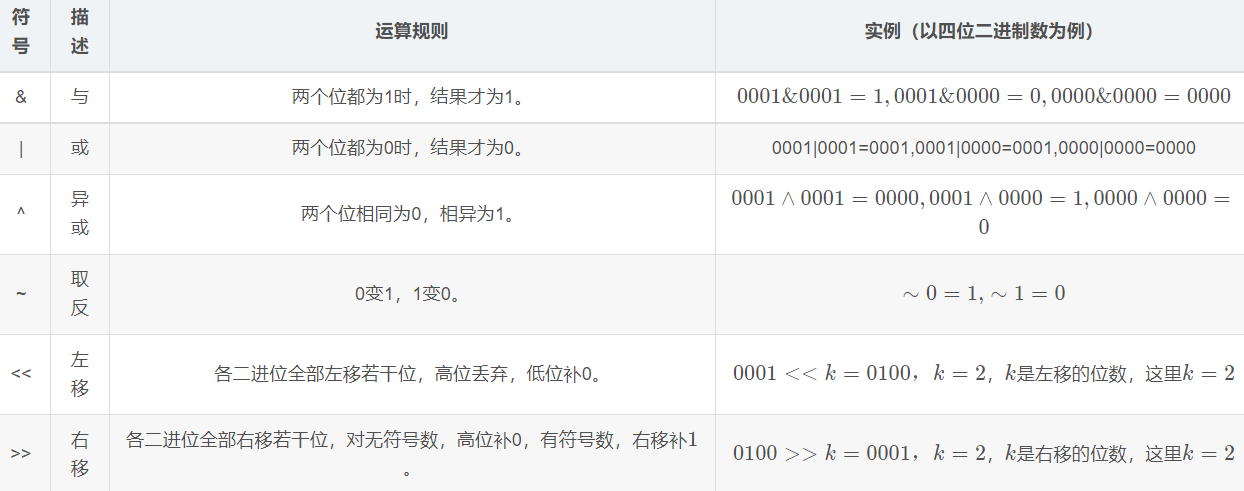

# 链表
```CPP
struct ListNode{
    int val;
    ListNode *next;
    ListNode(int x):val(x),next(nullptr){};
};
```

## 206. 反转链表
给你单链表的头节点 head ，请你反转链表，并返回反转后的链表。
```CPP
class Solution {
public:
    ListNode* reverseList(ListNode* head) {
        ListNode *prev{nullptr}, *next;
        while(head){
            next=head->next; // 保存下一个节点
            head->next=prev; // 改变节点指向
            prev=head;       // 下一轮的节点指向是当前
            head=next;
        }
        return prev;
    }
};
```

## 21. 合并两个有序链表
将两个升序链表合并为一个新的 升序 链表并返回。新链表是通过拼接给定的两个链表的所有节点组成的。 
```CPP
class Solution {
public:
    ListNode* mergeTwoLists(ListNode* list1, ListNode* list2) {
        ListNode* head=new ListNode(0);  // !!!这里必须动态分配新内存！
        ListNode* tp=head;
        while(list1||list2){
            if(!list1){ // list1到遍历到末尾
                head->next=list2;
                break;
            }
            else if(!list2){
                head->next=list1;
                break;
            }
            if(list1->val<list2->val){
                head->next=list1;
                list1=list1->next;
                head=head->next;
            }
            else{
                head->next=list2;
                list2=list2->next;
                head=head->next;
            }
        }
        return tp->next;
    }
};
```

## ！160. 相交链表
给你两个单链表的头节点 headA 和 headB ，请你找出并返回两个单链表相交的起始节点。如果两个链表不存在相交节点，返回 null 。
```CPP
class Solution {
public:
    ListNode *getIntersectionNode(ListNode *headA, ListNode *headB) {
        ListNode *tp1{headA}, *tp2{headB};
        if(!tp1||!tp2) return nullptr;
        while(tp1!=tp2){
            tp1=tp1?tp1->next:headB;
            tp2=tp2?tp2->next:headA;
        }
        return tp1;
    }
};
```

## （Re）234. 回文链表
给你一个单链表的头节点 head ，请你判断该链表是否为回文链表。如果是，返回 true ；否则，返回 false 。

法1
```CPP
class Solution {
public:
    bool isPalindrome(ListNode* head) {
        ListNode* fast{head},*slow{head};
        // 法1：快慢指针+栈
        stack<int> s;
        s.push(slow->val);
        // 偶数链表slow在中左，奇数在中间
        while(fast){
            if(fast->next){
                fast=fast->next->next;
                if(fast){ 
                    slow=slow->next;
                }
                else{ // 偶数情况
                    break;
                }
            }
            else{ // 奇数情况下中间的值不需要比较
                s.pop();
                break;
            }
            s.push(slow->val);
        }
        slow=slow->next;
        while(!s.empty()){
            int tp{s.top()};
            s.pop();
            if(!slow||slow->val!=tp) return false;
            slow=slow->next;
        }
        return slow?false:true;
    }
};
```
法2
```CPP
class Solution {
public:
    bool isPalindrome(ListNode* head) {
        if(!(head->next)) return true;
        ListNode* fast{head},*slow{head};
        // 法2：快慢指针+反转前半段
        ListNode *next{head->next}, *prev{nullptr};
        // 偶数链表slow在中左，奇数在中间
        while(fast){
            if(fast->next){
                fast=fast->next->next;
                // 反转
                next=slow->next;
                slow->next=prev;
                prev=slow;
                slow=next;
            }
            else{
                // 奇数情况
                next=next->next;
                break;
            }
        }
        while(prev&&next){
            if(prev->val!=next->val) return false;
            else{
                prev=prev->next;
                next=next->next;
            }
        }
        return !prev&&!next?true:false;
    }
};
```

## ！19. 删除链表的倒数第 N 个结点
**如何通过前后指针找到第 N 个结点**

给你一个链表，删除链表的倒数第 n 个结点，并且返回链表的头结点。

```CPP
class Solution {
public:
    ListNode* removeNthFromEnd(ListNode* head, int n) {
        if(!head->next) return nullptr;
        // 前后指针，后指针比前指针后n个，其为倒数n个节点的前一个节点
        ListNode *fast{head},*slow{head}, *dp;
        while(n){
            fast=fast->next;
            --n;
        }
        // 边界1：待删除节点为第一个节点
        if(!fast) return head->next;
        while(fast){
            fast=fast->next;
            dp=slow;
            slow=slow->next;
        }
        // 边界2：删除最后一个节点
        if(dp->next->next){
            dp->next=dp->next->next;
        }
        else{
            dp->next=nullptr;
        }
        return head;
    }
};
```

## ！[82. 删除排序链表中的重复元素 II](https://leetcode.cn/problems/remove-duplicates-from-sorted-list-ii/)

**官解简化版：使用dummy节点指向头节点，以避免头节点的讨论**
给定一个已排序的链表的头 `head` ， *删除原始链表中所有重复数字的节点，只留下不同的数字* 。返回 *已排序的链表* 。

1
```CPP
class Solution {
public:
    ListNode* deleteDuplicates(ListNode* head) {
        if (!head) {
            return head;
        }
        
        ListNode* dummy = new ListNode(0, head);

        ListNode* cur = dummy;
        while (cur->next && cur->next->next) {
            if (cur->next->val == cur->next->next->val) {
                int x = cur->next->val;
                while (cur->next && cur->next->val == x) {
                    cur->next = cur->next->next;
                }
            }
            else {
                cur = cur->next;
            }
        }

        return dummy->next;
    }
};


```

2
```CPP
class Solution {
public:
    ListNode* deleteDuplicates(ListNode* head) {
        ListNode *dummy{new ListNode(0)},*prev{dummy},*next;
        dummy->next=head;
        int cur=INT_MAX;
        // 若当前值与已删除节点的值相同，或与下一个值重复，则删除
        while(head){
            if(head->val==cur){
                next=head->next;
                prev->next=next;
                delete head;
                head=next;
            }
            else if(head->next&&head->next->val==head->val){
                cur=head->val;
                next=head->next->next;
                prev->next=next;
                delete head->next;
                delete head;
                head=next;
            }
            else{
                prev=head;
                head=head->next;
            }
        }
        return dummy->next;
    }
};
```

## [2. 两数相加](https://leetcode.cn/problems/add-two-numbers/)

给你两个 **非空** 的链表，表示两个非负的整数。它们每位数字都是按照 **逆序** 的方式存储的，并且每个节点只能存储 **一位** 数字。

请你将两个数相加，并以相同形式返回一个表示和的链表。

你可以假设除了数字 0 之外，这两个数都不会以 0 开头。

**直观思路：用数表示，但会溢出**
```CPP
class Solution {
public:
    ListNode* addTwoNumbers(ListNode* l1, ListNode* l2) {
        // 法1：用两个数
        long long int a{0},b{0},sum,digit{1};
        while(l1){
            a=a+l1->val*digit;
            l1=l1->next;
            digit*=10;
        }
        digit=1;
        while(l2){
            b=b+l2->val*digit;
            l2=l2->next;
            digit*=10;
        }
        sum=a+b;
        // cout<<sum;
        // 以逆序构建链表
        ListNode *out=new ListNode(0), *dummy{out};
        if(!sum) return out;
        while(sum){
            out->val=sum%10;
            sum/=10;
            if(sum) out->next=new ListNode(0);
            else break;
            out=out->next;
        }
        return dummy;
    }
};
```

**直接两个链表相加**
```CPP
class Solution {
public:
    ListNode* addTwoNumbers(ListNode* l1, ListNode* l2) {
        // 法2：两个链表相加
        ListNode *dummy{new ListNode(0)},*head{dummy};
        int up{0},val;
        while(l1&&l2){
            dummy->next=new ListNode(0);
            dummy=dummy->next;
            val=l1->val+l2->val+up;
            dummy->val=val%10;
            if(val/10) up=1;
            else up=0;
            l1=l1->next;
            l2=l2->next;
        }
        if(l1){
            while(l1){
                dummy->next=new ListNode(0);
                dummy=dummy->next;
                val=l1->val+up;
                dummy->val=val%10;
                if(val/10) up=1;
                else up=0;
                l1=l1->next;
            }
        }
        if(l2){
            while(l2){
                dummy->next=new ListNode(0);
                dummy=dummy->next;
                val=l2->val+up;
                dummy->val=val%10;
                if(val/10) up=1;
                else up=0;
                l2=l2->next;
            }
        }
        if(up) dummy->next=new ListNode(1);
        return head->next;
    }
};
```

https://leetcode.cn/problems/sort-list/

## [148. 排序链表](https://leetcode.cn/problems/sort-list/)

给你链表的头结点 `head` ，请将其按 **升序** 排列并返回 **排序后的链表** 。

法1：归并排序
```CPP
class Solution {
public:
    ListNode* sortList(ListNode* head) {
        return sortList(head, nullptr);
    }

    ListNode* sortList(ListNode* head, ListNode* tail) {
        if (head == nullptr) {
            return head;
        }
        if (head->next == tail) {
            head->next = nullptr;
            return head;
        }
        ListNode* slow = head, *fast = head;
        while (fast != tail) {
            slow = slow->next;
            fast = fast->next;
            if (fast != tail) {
                fast = fast->next;
            }
        }
        ListNode* mid = slow;
        return merge(sortList(head, mid), sortList(mid, tail));
    }

    ListNode* merge(ListNode* head1, ListNode* head2) {
        ListNode* dummyHead = new ListNode(0);
        ListNode* temp = dummyHead, *temp1 = head1, *temp2 = head2;
        while (temp1 != nullptr && temp2 != nullptr) {
            if (temp1->val <= temp2->val) {
                temp->next = temp1;
                temp1 = temp1->next;
            } else {
                temp->next = temp2;
                temp2 = temp2->next;
            }
            temp = temp->next;
        }
        if (temp1 != nullptr) {
            temp->next = temp1;
        } else if (temp2 != nullptr) {
            temp->next = temp2;
        }
        return dummyHead->next;
    }
};
```

## ！！！[143. 重排链表](https://leetcode.cn/problems/reorder-list/)

给定一个单链表 `L` 的头节点 `head` ，单链表 `L` 表示为：

```
L0 → L1 → … → Ln - 1 → Ln
```

请将其重新排列后变为：

```
L0 → Ln → L1 → Ln - 1 → L2 → Ln - 2 → …
```

```CPP
class Solution {
public:
    void reorderList(ListNode* head) {
        /*
            1. 快慢指针找到中点，倒排后半部分
            2. 插入
        */
        ListNode *fast{head}, *slow{head}, *tp, *next, *out{head};
        while(fast){
            if(fast->next) fast=fast->next->next;
            else fast=fast->next;
            slow=slow->next;
        }
        // 若无节点或只有一个节点，直接返回
        if(!slow) return;
        // 此时slow是后半部分的起点，反转即可
        next=slow->next;
        slow->next=nullptr;
        while(next){
            // 存储next->next
            tp=next->next;
            // 将next指向当前值
            next->next=slow;
            // 当前值为下一个值
            slow=next;
            next=tp; 
        }
        // 此时slow是后半部分的头部
        while(slow){
            next=head->next;
            tp=slow->next;
            head->next=slow;
            slow->next=next;
            head=next;
            slow=tp;
        }
        if(head) head->next=nullptr;
    }
};
```

# 二叉树
## 遍历顺序
前序遍历先遍历父结点，再遍历左结点，最后遍历右节点，我们得到的遍历顺序是[1 2 4 5 3
6]。
```CPP
void preorder(TreeNode* root) {
visit(root);
preorder(root->left);
preorder(root->right);
}
```

中序遍历先遍历左节点，再遍历父结点，最后遍历右节点，我们得到的遍历顺序是[4 2 5 1 3
6]。
```CPP
void inorder(TreeNode* root) {
inorder(root->left);
visit(root);
inorder(root->right);
}
```

后序遍历先遍历左节点，再遍历右结点，最后遍历父节点，我们得到的遍历顺序是[4 5 2 6 3
1]。
```CPP
void postorder(TreeNode* root) {
postorder(root->left);
postorder(root->right);
visit(root);
}
```
二叉查找树（Binary Search Tree, BST）是一种特殊的二叉树：对于每个父节点，其左子节点的值小于等于父结点的值，其右子节点的值大于等于父结点的值。

## 存储方式
普通二叉树 一般采用 链式存储结构 ，比如 二叉链表，三叉链表；
完全二叉树 一般采用 顺序存储结构，比如 数组；

**采用数组存储的完全二叉树：假设数组下标从 1 开始，二叉树 的根结点存储在位置 1，如果根结点有左孩子，左孩子存储在位置 2 = 2 * 1，如果根结点有右孩子，右孩子存储在位置 3 = 2 * 1 + 1。对于存储在位置 i 的结点，如果它有左孩子，左孩子存储在位置 2 * i，如果它有右孩子，右孩子存储在位置 2 * i + 1。**

## 110. 平衡二叉树
**核心在于深度遍历的同时检查节点是否平衡**

给定一个二叉树，判断它是否是高度平衡的二叉树。

本题中，一棵高度平衡二叉树定义为：

一个二叉树每个节点 的左右两个子树的高度差的绝对值不超过 1 。

```CPP
class Solution {
public:
    bool isBalanced(TreeNode* root) {
        if(!root) return true;
        // 深度遍历，在遍历时检查每个节点
         return nodeBalanced(root)==-1?false:true;
    }

    int nodeBalanced(TreeNode* root) {
        // 深度遍历
        if(!root) return 0;
        // 检查当前节点的子节点深度
        int left_d=nodeBalanced(root->left), right_d=nodeBalanced(root->right);
        if(left_d==-1||right_d==-1||abs(left_d-right_d)>=2) return -1;
        // 返回当前节点深度
        int maxd{1};
        maxd= maxd+std::max(left_d, right_d);
        return maxd;
    }
};
```

## （Re）437. 路径总和 III
给定一个二叉树的根节点 root ，和一个整数 targetSum ，求该二叉树里节点值之和等于 targetSum 的 路径 的数目。

路径 不需要从根节点开始，也不需要在叶子节点结束，但是路径方向必须是向下的（只能从父节点到子节点）。

```CPP
class Solution {
public:
    unordered_map<long long, int> prefix;

    int dfs(TreeNode *root, long long curr, int targetSum) {
        if (!root) {
            return 0;
        }

        int ret = 0;
        curr += root->val;
        if (prefix.count(curr - targetSum)) {
            ret = prefix[curr - targetSum];
        }

        prefix[curr]++;
        ret += dfs(root->left, curr, targetSum);
        ret += dfs(root->right, curr, targetSum);
        prefix[curr]--;

        return ret;
    }

    int pathSum(TreeNode* root, int targetSum) {
        prefix[0] = 1;
        return dfs(root, 0, targetSum);
    }
};
```

## ！101. 对称二叉树
**关键在于用两个节点进行层次遍历**

给你一个二叉树的根节点 root ， 检查它是否轴对称。

```CPP
class Solution {
public:
    bool isSymmetric(TreeNode* root) {
        return root?chileNodeSym(root->right,root->left):true;
    }

    bool chileNodeSym(TreeNode *right,TreeNode *left){
        if(!right&&!left) return true;
        else if(!right||!left||right->val!=left->val) return false;
        return chileNodeSym(right->right,left->left)&&chileNodeSym(right->left,left->right);
    }
};
```

## !层次遍历：637. 二叉树的层平均值
给定一个非空二叉树的根节点 root , 以数组的形式返回每一层节点的平均值。与实际答案相差 10-5 以内的答案可以被接受。

 ```CPP
class Solution {
public:
    vector<double> averageOfLevels(TreeNode* root) {
        vector<double> ans;
        if (!root) {
            return ans;
        }
        queue<TreeNode*> q;
        q.push(root);
        while (!q.empty()) {
            int count = q.size();
            double sum = 0;
            for (int i = 0; i < count; ++i) {
                TreeNode* node = q.front();
                q.pop();
                sum += node->val;
                if (node->left) {
                    q.push(node->left);
                }
                if (node->right) {
                    q.push(node->right);
                }
            }
            ans.push_back(sum / count);
        }
        return ans;
    }
    };
```

## (TODO)105. 从前序与中序遍历序列构造二叉树
给定两个整数数组 preorder 和 inorder ，其中 preorder 是二叉树的先序遍历， inorder 是同一棵树的中序遍历，请构造二叉树并返回其根节点。

```CPP
class Solution {
public:
    unordered_map<int,int> m;
    TreeNode* buildTree(vector<int>& preorder, vector<int>& inorder) {
        /*  前序是中左右，中序是左中右
            中序遍历中根节点左边为左子树根节点，通过左子树值在前序中找到右子树值
            由于无重复元素，可直接对应查找inorder
            buildTreeHelper给定子树的preorder区间，构造子树
        */
        TreeNode *t{new TreeNode(preorder[0])}, *o{t};
        for(int i{0};i<inorder.size();++i){
            m.insert({inorder[i],i});
        }
        buildTreeHelper(t,preorder,0,preorder.size()-1);
        return o;
    }
    void buildTreeHelper(TreeNode *t, vector<int>& preorder, int p1, int p2){
        // 边界
        if(p1>=p2) return;
        // p1为该子树开始节点即中心节点，p2为该子树结束节点
        int num{0}; // 左子树范围
        // if(t->val==2){
        //     cout<<p1<<"\t"<<p2<<"\t"<<num<<"\t";
        // }
        if(m[preorder[p1+1]]>=m[t->val]){ // 左子树节点不存在
            t->left=nullptr;
        }
        else{
            // 左节点
            t->left=new TreeNode(preorder[p1+1]);
            // 构建左子树
            num=m[t->val]-p1;
            buildTreeHelper(t->left,preorder,p1+1,p1+num);
        }
        // 右节点，范围是[p1+1+num,p2]
        // 右子树节点不存在的两种情况：1.越界 2.右节点在中节点左边
        if(p2<p1+1+num||m[preorder[p1+1+num]]<=m[t->val]){ 
            t->right=nullptr;
        }
        else{
            // 右节点
            t->right=new TreeNode(preorder[p1+1+num]);
            // 构建右子树
            buildTreeHelper(t->right,preorder,p1+1+num,p2);
        }
    }
};
```

## ！[669. 修剪二叉搜索树](https://leetcode.cn/problems/trim-a-binary-search-tree/)

**重点在于**只关注当前节点，如不符合则返回符合的节点，递归实现

给你二叉搜索树的根节点 `root` ，同时给定最小边界`low` 和最大边界 `high`。通过修剪二叉搜索树，使得所有节点的值在`[low, high]`中。修剪树 **不应该** 改变保留在树中的元素的相对结构 (即，如果没有被移除，原有的父代子代关系都应当保留)。 可以证明，存在 **唯一的答案** 。

所以结果应当返回修剪好的二叉搜索树的新的根节点。注意，根节点可能会根据给定的边界发生改变。
```CPP
class Solution {
public:
    TreeNode* trimBST(TreeNode* root, int low, int high) {
        if(!root) return nullptr;
        // 递归实现，对于不符合要求的节点，返回其符合要求的子节点
        int val{root->val};
        // 检查当前节点
        if(val<low){
            root=trimBST(root->right,low,high);
        }
        else if(val>high){
            root=trimBST(root->left,low,high);
        }
        if(!root) return nullptr;
        // 检查左右节点
        root->left=trimBST(root->left,low,high);
        root->right=trimBST(root->right,low,high);
        return root;
    }
};
```

## [208. 实现 Trie (前缀树)](https://leetcode.cn/problems/implement-trie-prefix-tree/)

难度中等1427

**[Trie](https://baike.baidu.com/item/字典树/9825209?fr=aladdin)**（发音类似 "try"）或者说 **前缀树** 是一种树形数据结构，用于高效地存储和检索字符串数据集中的键。这一数据结构有相当多的应用情景，例如自动补完和拼写检查。
```CPP
#include<iostream>
#include<string>
#include <vector>

using namespace std;

class TrieNode {
public:
    bool is_val;
    vector<TrieNode*> alpha;

    TrieNode():is_val(false){
        for(int i{0};i<26;++i){
            alpha.push_back(nullptr);
        }
    };
};

class Trie {
public:
    /*  字典树
        1. 每个节点代表一个单词
        2. 每个节点的子节点有26个子节点
        3. 子节点按顺序排列，值用布尔表示以这个字母结尾的单词是否存在
    */
    TrieNode *root;

    Trie() {
        root=new TrieNode();
        root->is_val=true;
    }

    void insert(const string& word) {
        TrieNode *t{root};
        if(!word.size()) return;
        // 插入每个节点，将单词的最后一个字母节点设定为true
        for(const char &c:word){
            if(!t->alpha[c-'a']){
                t->alpha[c-'a']=new TrieNode();
            }
            t=t->alpha[c-'a'];
        }
        t->is_val= true;
    }

    bool search(const string& word) {
        TrieNode *t{root};
        int n=word.size();
        for(int i{0};i<n;++i){
            if(!t) return false;
            t=t->alpha[word[i]-'a'];
        }
        // 检查当前节点有无值
        return t?t->is_val:false;
    }

    bool startsWith(const string& prefix) {
        TrieNode *t{root};
        for(const char &c:prefix){
            if(!t) return false;
            // cout<<c<<"\n";
            t=t->alpha[c-'a'];
        }
        return t?true:false;
    }
};
```

## ！[662. 二叉树最大宽度](https://leetcode.cn/problems/maximum-width-of-binary-tree/)

给你一棵二叉树的根节点 `root` ，返回树的 **最大宽度** 。

树的 **最大宽度** 是所有层中最大的 **宽度** 。

每一层的 **宽度** 被定义为该层最左和最右的非空节点（即，两个端点）之间的长度。将这个二叉树视作与满二叉树结构相同，两端点间会出现一些延伸到这一层的 `null` 节点，这些 `null` 节点也计入长度。

题目数据保证答案将会在 **32 位** 带符号整数范围内。

**法1：层次遍历+采用数组索引标号完全二叉树的方式计算宽度**
```CPP
class Solution {
public:
    int widthOfBinaryTree(TreeNode* root) {
        // 层次遍历+采用数组索引标号完全二叉树的方式计算宽度
        unsigned long long depth_max{1};
        queue<pair<TreeNode*,unsigned long long>> s;
        s.emplace(root,1L);
        while(!s.empty()){ // 去除一层中的所有节点，计算最大最小宽度
            // 这里方式有问题，直接最右边节点减去最左边即可
            unsigned long long left{s.front().second},right{s.front().second},size=s.size();
            for(int i{0};i<size;++i){
                auto [t,index]=s.front();
                s.pop();
                left=min(index,left);
                right=max(index,right);
                // 加入左右子节点
                // cout<<left<<" "<<right<<" "<<index<<endl;
                if(t->left) s.emplace(t->left,2*index);
                if(t->right) s.emplace(t->right,2*index+1);
            }
            depth_max=max(depth_max,right-left+1);
        }
        return depth_max;
    }
};
```

**法2：使用深度优先搜索，只对每一层的第一个值进行存储，其他值只进行比较求宽度。用一个哈希表记录每一层的宽度**
```CPP
using ULL = unsigned long long;

class Solution {
public:
    int widthOfBinaryTree(TreeNode* root) {
        unordered_map<int, ULL> levelMin;
        function<ULL(TreeNode*, int, ULL)> dfs = [&](TreeNode* node, int depth, ULL index)->ULL {
            if (node == nullptr) {
                return 0LL;
            }
            if (!levelMin.count(depth)) {
                levelMin[depth] = index; // 每一层最先访问到的节点会是最左边的节点，即每一层编号的最小值
            }
            return max({index - levelMin[depth] + 1LL, dfs(node->left, depth + 1, index * 2), dfs(node->right, depth + 1, index * 2 + 1)});
        };
        return dfs(root, 1, 1LL);
    }
};

```

# 字符串

## 647. 回文子串
给你一个字符串 s ，请你统计并返回这个字符串中 回文子串 的数目。

回文字符串 是正着读和倒过来读一样的字符串。

子字符串 是字符串中的由连续字符组成的一个序列。

具有不同开始位置或结束位置的子串，即使是由相同的字符组成，也会被视作不同的子串。

**法1：穷举法**
```CPP
class Solution:
    def countSubstrings(self, s: str) -> int:
        l=len(s)
        count=0
        for i in range(l):
            for j in range(i,l):
                if self.isSub(s[i:j+1]):
                    count+=1
        return count

    def isSub(self,s):
        if s==s[::-1]:
            # print(s)
            return True
        else:
            return False
```

**法2：以中心位置穷举**
```CPP
class Solution {
public:
    int countSubstrings(string s) {
        int num = 0;
        int n = s.size(); 
        for(int i=0;i<n;i++)//遍历回文中心点
        {
            for(int j=0;j<=1;j++)//j=0,中心是一个点，j=1,中心是两个点
            {
                int l = i;
                int r = i+j;
                while(l>=0 && r<n && s[l--]==s[r++])num++;
            }
        }
        return num;
    }
};
```

## ！[5. 最长回文子串](https://leetcode.cn/problems/longest-palindromic-substring/)

给你一个字符串 `s`，找到 `s` 中最长的回文子串。

如果字符串的反序与原始字符串相同，则该字符串称为回文字符串。

```CPP
class Solution {
public:
    string longestPalindrome(string s) {
        /*
            1. dp[i][j]表示从i到j的字符子串是否为回文
            2. dp[i][j]=dp[i+1][j-1]&&s[i]==s[j]?true:false;
            3. j-i<3只需判断s[i]==s[j]
        */
        int n=s.length();
        vector<bool> dp(n);
        int start{0},max_length{0};
        for(int i{n-1};i>=0;--i){
            for(int j{n-1};j>=i;--j){
                if(j-i<3) dp[j]=(s[i]==s[j])?true:false;
                else dp[j]=(dp[j-1]&&s[i]==s[j])?true:false;
                if(dp[j]&&max_length<j-i+1){
                    start=i;
                    max_length=j-i+1;
                }
            }
        }
        return s.substr(start,max_length);
    }
};
```

## ！696. 计数二进制子串
给定一个字符串 s，统计并返回具有相同数量 0 和 1 的非空（连续）子字符串的数量，并且这些子字符串中的所有 0 和所有 1 都是成组连续的。

重复出现（不同位置）的子串也要统计它们出现的次数。

```CPP
class Solution {
public:
    int countBinarySubstrings(string s) {
        int n=s.length(),num{0};
        if(n==1) return 0;
        // 记录以s[i]结尾的连续数，l1是0的，l2是1的
        int l0{0},l1{0};
        if(s[0]=='0'){
            ++l0;
        }
        else{
            ++l1;
        }
        for(int i{1};i<n;++i){
            if(s[i]=='1'){
                if(s[i-1]=='0'){
                    l1=1;
                    ++num;
                }
                else{
                    if(l1+1<=l0) ++num;
                    ++l1;
                }
            }
            else{
                if(s[i-1]=='1'){
                    l0=1;
                    ++num;
                }
                else{
                    if(l0+1<=l1) ++num;
                    ++l0;
                }
            }
        }
        return num;
    }
};
```

## ！227. 基本计算器 II
给你一个字符串表达式 s ，请你实现一个基本计算器来计算并返回它的值。

整数除法仅保留整数部分。

你可以假设给定的表达式总是有效的。所有中间结果将在 [-231, 231 - 1] 的范围内。

注意：不允许使用任何将字符串作为数学表达式计算的内置函数，比如 eval() 。

```CPP
class Solution {
public:
    int calculate(string s) {
        /*
            !!!可能会溢出，所以用double
            1. 每次遇到符号时处理前一个符号的值，这样可以保证符号前后值均已知
            2. 使用数组管理所有数，最后进行加减
            3. 前置符号为+号
        */
        char preSign='+';
        vector<int> nums;
        int i{0},n=s.length();
        double cur_num{0};
        while(i<=n){
            char s_i= i==n?'+':s[i];
            ++i;
            if(s_i==' ') continue;
            else if(isdigit(s_i)){
                cur_num=s_i-'0';
                while(isdigit(s[i])){
                    cur_num=cur_num*10+s[i]-'0';
                    ++i;
                }
            }
            else{ //处理符号
                switch(preSign){
                    case '+':
                        nums.push_back(cur_num);
                        break;
                    case '-':
                        nums.push_back(-cur_num);
                        break;
                    case '*':
                        nums.back()*=cur_num;
                        break;
                    case '/':
                        nums.back()/=cur_num;
                        break;
                }
                // 将当前符号设为前一个符号
                preSign=s_i;
            }
        }
        return accumulate(nums.begin(),nums.end(),0);
    }
};
```

## （Re）241. 为运算表达式设计优先级
给你一个由数字和运算符组成的字符串 expression ，按不同优先级组合数字和运算符，计算并返回所有可能组合的结果。你可以 按任意顺序 返回答案。

生成的测试用例满足其对应输出值符合 32 位整数范围，不同结果的数量不超过 104 。

**法1：分治法：计算符号左右两边可能的情况，边界条件为只有单个数字**
```CPP
class Solution {
public:
    vector<int> diffWaysToCompute(string input) {
        vector<int> ways;
        for (int i = 0; i < input.length(); i++) {
            char c = input[i];
            if (c == '+' || c == '-' || c == '*') {
                vector<int> left = diffWaysToCompute(input.substr(0, i));
                vector<int> right = diffWaysToCompute(input.substr(i + 1));
                for (const int & l: left) {
                    for (const int & r: right) {
                        switch (c) {
                            case '+': ways.push_back(l + r); break;
                            case '-': ways.push_back(l - r); break;
                            case '*': ways.push_back(l * r); break;
                        }
                    }
                }
            }
        }
        if (ways.empty()) ways.push_back(stoi(input));
        return ways;
    }
};
```

**法2：直接使用动态规划**
```CPP
class Solution {
public:
    vector<int> diffWaysToCompute(string input) {
        vector<int> data;
        vector<char> ops;
        int num = 0;
        char op = ' ';
        istringstream ss(input + "+");
        // 分别保存数字和运算符
        while (ss >> num && ss >> op) {
            data.push_back(num);
            ops.push_back(op);
        }
        int n = data.size();
        // 表示左右区间的右端点为i，左端点为j的情况数目
        // 两个for为遍历i,j之间的所有区间种类数，即[j,k]和[k+1,i]
        vector<vector<vector< int>>> dp(n, vector < vector < int >> (n, vector<int>()));
        for (int i = 0; i < n; ++i) {
            for (int j = i; j >= 0; --j) {
                if (i == j) {
                    dp[j][i].push_back(data[i]);
                } else {
                    for (int k = j; k < i; k += 1) {
                        for (auto left: dp[j][k]) {
                            for (auto right: dp[k + 1][i]) {
                                int val = 0;
                                switch (ops[k]) {
                                    case '+':
                                        val = left + right;
                                        break;
                                    case '-':
                                        val = left - right;
                                        break;
                                    case '*':
                                        val = left * right;
                                        break;
                                }
                                dp[j][i].push_back(val);
                            }
                        }
                    }
                }
            }
        }
        return dp[0][n - 1];
    }
};
```

# 排序
1. 插入排序：从0开始遍历，保持0到遍历点的序列顺序正确（即调整第i个数到正确的顺序）
2. 冒泡排序：从0开始遍历，比较i和i+1的大小，维持大的值在右边，这样最大值在一次迭代后会在最右边
3. 选择排序：从0开始遍历，选出最小的值排在最左边
4. 归并排序（分治法）：不断分块，然后排序
5. 桶排序：划分区间，放入区间，区间内排序，取出
6. 快速排序（归并法+冒泡排序）：选一个数作为基准值，将比它小的值放在他左边，大的值放在右边，递归排序左右两个区间

## RE 3. 无重复字符的最长子串

给定一个字符串 s ，请你找出其中不含有重复字符的 最长子串 的长度。

法1：动态规划+查找之前的字符是否相等

```CPP
class Solution {
public:
    int lengthOfLongestSubstring(string s) {
        /*
        dp解法，dp[i]表示以第i+1个为结尾的最长子串
        dp[i]=dp[i-1]+1 
        */
        int n=s.length(),maxx{1};
        if(!n) return 0;
        int i1{1},i2{1};
        for(int i{1};i<n;++i){
            bool t{true};
            for(int j{i-i1};j<i;++j){
                if(s[i]==s[j]){
                    i2=i-j;
                    t=false;
                    break;
                }
            }
            if(t) i2=i1+1;
            i1=i2;
            maxx=max(maxx,i2);
        }
        return maxx;
    }
};
```

法2：使用哈希减少匹配时间，维护动态窗口

```cpp
class Solution {
public:
    int lengthOfLongestSubstring(string s) {
        // 哈希集合，记录每个字符是否出现过
        unordered_set<char> occ;
        int n = s.size();
        // 右指针，初始值为 -1，相当于我们在字符串的左边界的左侧，还没有开始移动
        int rk = -1, ans = 0;
        // 枚举左指针的位置，初始值隐性地表示为 -1
        for (int i = 0; i < n; ++i) {
            if (i != 0) {
                // 左指针向右移动一格，移除一个字符
                occ.erase(s[i - 1]);
            }
            while (rk + 1 < n && !occ.count(s[rk + 1])) {
                // 不断地移动右指针
                occ.insert(s[rk + 1]);
                ++rk;
            }
            // 第 i 到 rk 个字符是一个极长的无重复字符子串
            ans = max(ans, rk - i + 1);
        }
        return ans;
    }
};
```

## 其他解法[347. 前 K 个高频元素](https://leetcode.cn/problems/top-k-frequent-elements/)

给你一个整数数组 `nums` 和一个整数 `k` ，请你返回其中出现频率前 `k` 高的元素。你可以按 **任意顺序** 返回答案。

法1：自己写的

```CPP
class Solution {
public:
    vector<int> topKFrequent(vector<int>& nums, int k) {
        int n=nums.size();
        if(n==1) return vector<int>{1};
        vector<int> v1;
        vector<pair<int,int>> p;
        // 桶
        unordered_map<int,int> m;
        for(int i{0};i<n;++i){
            ++m[nums[i]];
        }
        // 取出并排序
        for(auto i{m.begin()};i!=m.end();++i){
            p.push_back({i->first,i->second});
        }
        sort(p.begin(),p.end(),[](auto& a, auto& b){
            return a.second>b.second;
        });
        for(int i{0};i<k;++i){
            v1.push_back(p[i].first);
        }
        return v1;
    }
};
```

法2：双桶，桶排序后在使用频率作为桶对其排序

```CPP
vector<int> topKFrequent(vector<int>& nums, int k) {
unordered_map<int, int> counts;
int max_count = 0;
for (const int & num : nums) {
max_count = max(max_count, ++counts[num]);
}
vector<vector<int>> buckets(max_count + 1);
for (const auto & p : counts) {
buckets[p.second].push_back(p.first);
}
vector<int> ans;
for (int i = max_count; i >= 0 && ans.size() < k; --i) {
for (const int & num : buckets[i]) {
ans.push_back(num);
if (ans.size() == k) {
break;
}
}
}
return ans;
}
```

## (Re)[215. 数组中的第K个最大元素](https://leetcode.cn/problems/kth-largest-element-in-an-array/)

给定整数数组 `nums` 和整数 `k`，请返回数组中第 `**k**` 个最大的元素。

请注意，你需要找的是数组排序后的第 `k` 个最大的元素，而不是第 `k` 个不同的元素。

你必须设计并实现时间复杂度为 `O(n)` 的算法解决此问题。

**法1：最大堆排序，执行k次删除操作即可**
```CPP
class Solution {
public:
    void maxHeapify(vector<int>& a, int i, int heapSize) {
        int l = i * 2 + 1, r = i * 2 + 2, largest = i;
        if (l < heapSize && a[l] > a[largest]) {
            largest = l;
        } 
        if (r < heapSize && a[r] > a[largest]) {
            largest = r;
        }
        if (largest != i) {
            swap(a[i], a[largest]);
            maxHeapify(a, largest, heapSize);
        }
    }

    void buildMaxHeap(vector<int>& a, int heapSize) {
        for (int i = heapSize / 2; i >= 0; --i) {
            maxHeapify(a, i, heapSize);
        } 
    }

    int findKthLargest(vector<int>& nums, int k) {
        int heapSize = nums.size();
        buildMaxHeap(nums, heapSize);
        for (int i = nums.size() - 1; i >= nums.size() - k + 1; --i) {
            swap(nums[0], nums[i]);
            --heapSize;
            maxHeapify(nums, 0, heapSize);
        }
        return nums[0];
    }
};
```

**法2：快速排序+选择区间，随机选择中心点**
 ```CPP
class Solution {
public:
    int quickSelect(vector<int>& a, int l, int r, int index) {
        int q = randomPartition(a, l, r);
        if (q == index) {
            return a[q];
        } else {
            return q < index ? quickSelect(a, q + 1, r, index) : quickSelect(a, l, q - 1, index);
        }
    }

    inline int randomPartition(vector<int>& a, int l, int r) {
        int i = rand() % (r - l + 1) + l;
        swap(a[i], a[r]);
        return partition(a, l, r);
    }

    inline int partition(vector<int>& a, int l, int r) {
        int x = a[r], i = l - 1;
        for (int j = l; j < r; ++j) {
            if (a[j] <= x) {
                swap(a[++i], a[j]);
            }
        }
        swap(a[i + 1], a[r]);
        return i + 1;
    }

    int findKthLargest(vector<int>& nums, int k) {
        srand(time(0));
        return quickSelect(nums, 0, nums.size() - 1, nums.size() - k);
    }
};
```

## （RE）快速排序：[912. 排序数组](https://leetcode.cn/problems/sort-an-array/)

难度中等820

给你一个整数数组 `nums`，请你将该数组升序排列。

**1：hoare方法，找到两个可以交换的元素才进行交换，超出时间限制**
```CPP
#include<iostream>
#include<string>
#include <vector>

using namespace std;

void quickSort(vector<int>& nums,int i,int j){
    if(i>=j) return;
    cout<<i<<"\t"<<j<<"\n";
    // 取最左边的数，双指针m和n，nums[m]<num_k&&nums[n]>num_k则交换
    int num_k{nums[i]},m{i+1},n{j};
    while(m<n){
//        cout<<m<<n;
        while(m<n&&nums[m]<=num_k) ++m;
        while(m<n&&nums[n]>=num_k) --n;
        swap(nums[m],nums[n]);
    }
    // 用的最左边的元素作为k，因此要换到左区间来
//    if(num_k<nums[m]&&m>i){
//        m-=1;
//    }
    swap(nums[i],nums[m]);
    // 递归
    quickSort(nums,i,m-1);
    quickSort(nums,m+1,j);
}

vector<int> sortArray(vector<int>& nums) {
    /* 快速排序 选一个数，将比他小的放左边
    */
    int n=nums.size();
    quickSort(nums,0,n-1);
    return nums;
}

int main() {
    vector<int> a{5,4,3,1,2};
    sortArray(a);
    for(auto el:a)
    {
        cout<<el<<"\t";
    }    
    return 0;
}
```

# 回溯法
回溯法，一般可以解决如下几种问题：组合和排序问题

+ 组合问题：N个数里面按一定规则找出k个数的集合
+ 切割问题：一个字符串按一定规则有几种切割方式
+ 子集问题：一个N个数的集合里有多少符合条件的子集
+ 排列问题：N个数按一定规则全排列，有几种排列方式
+ 棋盘问题：N皇后，解数独等等

回溯法解决的问题都可以抽象为树形结构，是的，我指的是所有回溯法的问题都可以抽象为树形结构！

因为回溯法解决的都是在集合中递归查找子集，集合的大小就构成了树的宽度，递归的深度，都构成的树的深度。

递归就要有终止条件，所以必然是一棵高度有限的树（N叉树）。
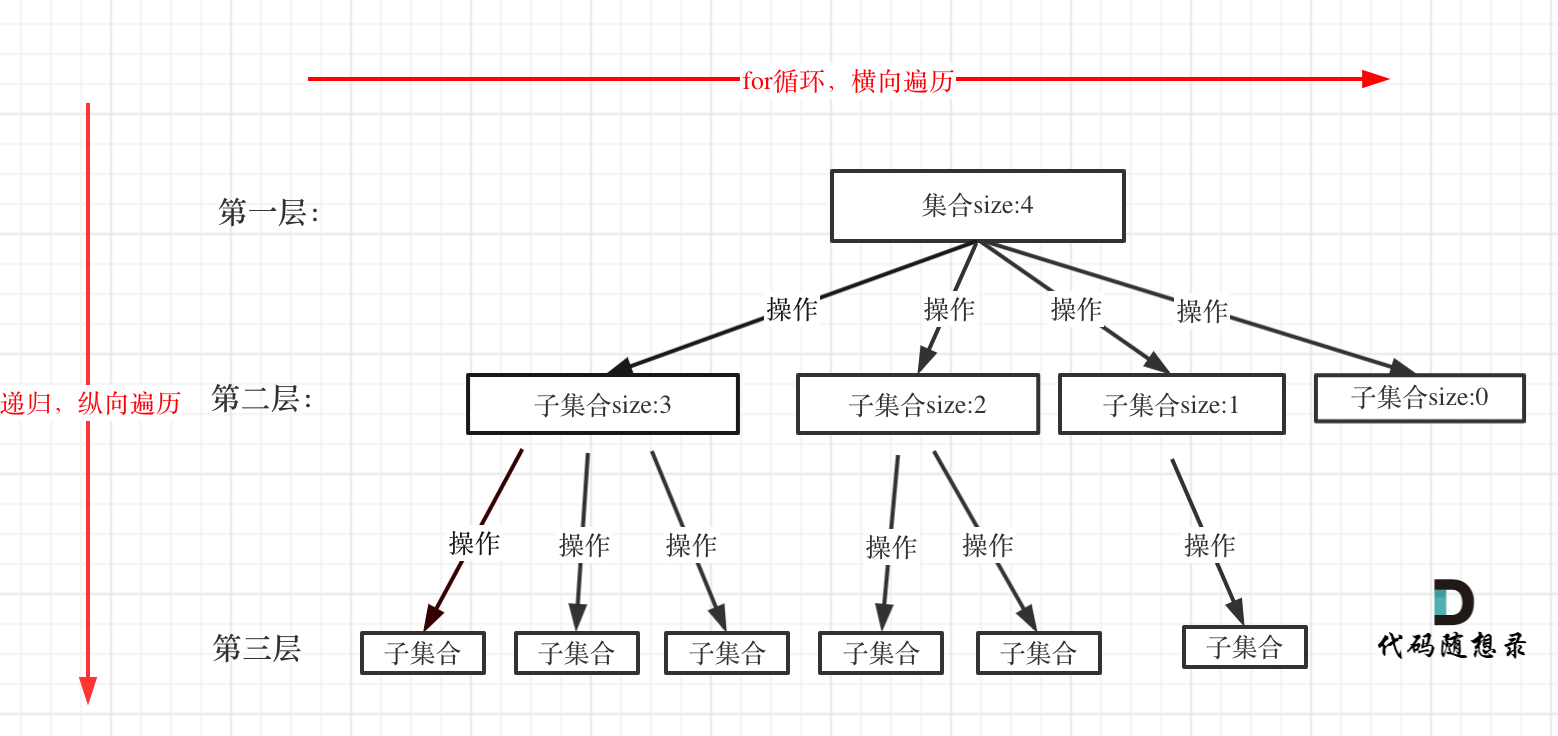

**大致算法**
```CPP
void backtracking(参数) {
    if (终止条件) {
        存放结果;
        return;
    }

    for (选择：本层集合中元素（树中节点孩子的数量就是集合的大小）) {
        处理节点;
        backtracking(路径，选择列表); // 递归
        回溯，撤销处理结果
    }
}
```

## ！[93. 复原 IP 地址](https://leetcode.cn/problems/restore-ip-addresses/)

**有效 IP 地址** 正好由四个整数（每个整数位于 `0` 到 `255` 之间组成，且不能含有前导 `0`），整数之间用 `'.'` 分隔。

- 例如：`"0.1.2.201"` 和` "192.168.1.1"` 是 **有效** IP 地址，但是 `"0.011.255.245"`、`"192.168.1.312"` 和 `"192.168@1.1"` 是 **无效** IP 地址。

给定一个只包含数字的字符串 `s` ，用以表示一个 IP 地址，返回所有可能的**有效 IP 地址**，这些地址可以通过在 `s` 中插入 `'.'` 来形成。你 **不能** 重新排序或删除 `s` 中的任何数字。你可以按 **任何** 顺序返回答案。
```CPP
class Solution {
public:
    vector<string> restoreIpAddresses(string s) {
        /*
            1. 深度+回溯，使用逗号作为分割条件
            2. 若是已选择第三个逗号，则需要检查第四段是否合格
            3. 剪枝：逗号个数小于4
        */
        vector<string> out;
        dfs(s,0,-1,out);
        return out;
    }

    void dfs(string &s, int dot_num, int dot_index, vector<string> &out){
        // dot_num传入当前需要寻找的逗号是第几个，dot_index表示最后一个点的位置
        // 终止条件，确定第三个后需要检查是否符合后加入结果
        if(dot_num==3){
            // cout<<s<<endl;
            if(isValid(s,dot_index+1,s.length()-1)){
                out.push_back(s);
            }
            return;
        }
        int start=dot_index+1,i{0};
        // 循环检查是否符合要求，符合要求则进行回溯
        while(i<3){
            if(isValid(s,start,start+i)){
                s.insert(s.begin()+start+i+1,'.');  // 符合则插入句号，并回溯
                dfs(s,dot_num+1,start+i+1,out);
                s.erase(s.begin()+start+i+1);  // 回溯之后删除操作
            }
            ++i;
        }
    }

    bool isValid(string &s, int start, int end){
        // cout<<start<<" "<<end<<endl;
        if(start>end||end>=s.length()||start>=s.length()) return false;
        // 检查区间内字符串是否为正确的IP地址
        if(end-start+1>3) return false;
        else if(s[start]=='0'&&end-start>0) return false; // 避免前导零
        else{ // 判断是否为数字，且数字在0-255之间
            int num{0};
            while(start<=end){
                if(s[start]-'0'<10){
                    num=num*10+s[start]-'0';
                }
                else{
                    return false;
                }
                ++start;
            }
            if(num<=255&&num>=0) return true;
        }
        return false;
    }
};
```

# CodeTop

## ！[179. 最大数](https://leetcode.cn/problems/largest-number/)

给定一组非负整数 `nums`，重新排列每个数的顺序（每个数不可拆分）使之组成一个最大的整数。

**注意：**输出结果可能非常大，所以你需要返回一个字符串而不是整数。

```CPP
class Solution {
public:
    string largestNumber(vector<int>& nums) {
        /*  [95,9,6]
            1. 按数的每位的数字排序
            2. 通过字符串排序选择最大的数：选择95，比较第一位，有相同的则比较第二位
            3. 依次比较
        */
        vector<string> vs;
        for(auto el:nums){
            vs.push_back(to_string(el));
        }
        sort(vs.begin(),vs.end(),[](string &a, string &b){
            return a+b>b+a?true:false;
        });
        // 拼接
        if(vs[0]=="0") return "0"; // 防止有多个0存在时拼接
        string s="";
        for(auto el:vs){
            s+=el;
        }
        return s;
    }
};
```

## ！[468. 验证IP地址](https://leetcode.cn/problems/validate-ip-address/)
**核心**：1. try..except... 2. 使用ord转为ascii数比较

给定一个字符串 `queryIP`。如果是有效的 IPv4 地址，返回 `"IPv4"` ；如果是有效的 IPv6 地址，返回 `"IPv6"` ；如果不是上述类型的 IP 地址，返回 `"Neither"` 。

```py
v4="IPv4"
v6="IPv6"
neither="Neither"
class Solution:
    def validIPAddress(self, queryIP: str) -> str:
        #    1. 按照冒号分割
        #    2. 检查位数分别匹配v4和v6
        #    3. v4中第一个数不能是0，且整体在0-255之间
        #    4. v6包含数字和特定字母，且有四位
        ls=queryIP.split(".")
        if len(ls)==4:
            return self.checkV4(ls)
        else:
            ls=queryIP.split(":")
            if(len(ls)==8):
                return self.checkV6(ls)
        return neither

    def checkV4(self, ls):
        for el in ls:
            if len(el)>1 and el[0]=="0":
                return neither
            try:
                tp=int(el)
            except:
                return neither
            if 0<=tp<=255:
                continue
            else:
                return neither
        return v4

    def checkV6(self, ls):
        for el in ls:
            n=len(el)
            if 1<=n<=4:
                for num in el:
                    if 0<=ord(num)-ord('0')<10 or 0<=ord(num)-ord('a')<6 or 0<=ord(num)-ord('A')<6:
                        continue
                    else:
                        return neither
            else:
                return neither
        return v6
```

## ！152. 乘积最大子数组
给你一个整数数组 nums ，请你找出数组中乘积最大的非空连续子数组（该子数组中至少包含一个数字），并返回该子数组所对应的乘积。

测试用例的答案是一个 32-位 整数。

子数组 是数组的连续子序列。

```CPP
class Solution {
public:
    int maxProduct(vector<int>& nums) {
        /*
        直接连乘，维护最小和最大值，若遇到0则置0
        */
        int n=nums.size(),dp_min{1},dp_max{1},out{-INT_MAX},tp1,tp2;
        for(int i{0};i<n;++i){
            tp1=max(max(nums[i],dp_max*nums[i]),dp_min*nums[i]);
            tp2=min(min(nums[i],dp_max*nums[i]),dp_min*nums[i]);
            dp_max=tp1;
            dp_min=tp2;
            out=max(dp_max,out);
        }
        return out;
    }
};
```

## ！162. 寻找峰值
峰值元素是指其值严格大于左右相邻值的元素。

给你一个整数数组 nums，找到峰值元素并返回其索引。数组可能包含多个峰值，在这种情况下，返回 任何一个峰值 所在位置即可。

你可以假设 nums[-1] = nums[n] = -∞ 。

你必须实现时间复杂度为 O(log n) 的算法来解决此问题。

> 这道题，最最最重要的是条件，条件，条件，两边都是负无穷，数组当中可能有很多波峰，也可能只有一个，如果尝试画图，就跟股票信息一样，没有规律，如果根据中点値判断我们的二分方向该往何处取， 这道题还有只是返回一个波峰。你这样想，中点所在地方，可能是某座山的山峰，山的下坡处，山的上坡处，如果是山峰，最后会二分终止也会找到，关键是我们的二分方向，并不知道山峰在我们左边还是右边，送你两个字你就明白了，爬山（没错，就是带你去爬山），如果你往下坡方向走，也许可能遇到新的山峰，但是也许是一个一直下降的坡，最后到边界。但是如果你往上坡方向走，就算最后一直上的边界，由于最边界是负无穷，所以就一定能找到山峰，总的一句话，往递增的方向上，二分，一定能找到，往递减的方向只是可能找到，也许没有。

```CPP
class Solution {
public:
    int findPeakElement(vector<int>& nums) {
        int n=nums.size(),left{0},right{n-1};
        // 二分，只选择向上的方向 [1,2,3,1]
        while(left!=right){
            // cout<<left<<' '<<right<<endl;
            int mid=(left+right)/2;
            // 查找左右关系
            if(mid+1<n&&nums[mid]>nums[mid+1]){
                if(mid==0||nums[mid]>nums[mid-1]) return mid;
                right=mid-1;
                continue;
            }
            else left=mid+1;
        }
        return left;
    }
};
```

## (RE)[39. 组合总和](https://leetcode.cn/problems/combination-sum/)

给你一个 **无重复元素** 的整数数组 `candidates` 和一个目标整数 `target` ，找出 `candidates` 中可以使数字和为目标数 `target` 的 所有 **不同组合** ，并以列表形式返回。你可以按 **任意顺序** 返回这些组合。

`candidates` 中的 **同一个** 数字可以 **无限制重复被选取** 。如果至少一个数字的被选数量不同，则两种组合是不同的。 

对于给定的输入，保证和为 `target` 的不同组合数少于 `150` 个。

法1：**回溯法**
```CPP
class Solution {
public:
    void dfs(vector<int>& candidates, int target, vector<vector<int>>& ans, vector<int>& combine, int idx) {
        // 两个结束条件：候选数组已用尽或者目标已达到
        if (idx == candidates.size()) {
            return;
        }
        if (target == 0) {
            ans.emplace_back(combine);
            return;
        }
        // 直接跳过
        dfs(candidates, target, ans, combine, idx + 1);
        // 选择当前数
        if (target - candidates[idx] >= 0) {
            combine.emplace_back(candidates[idx]);
            dfs(candidates, target - candidates[idx], ans, combine, idx);
            combine.pop_back();
        }
    }

    vector<vector<int>> combinationSum(vector<int>& candidates, int target) {
        vector<vector<int>> ans;
        vector<int> combine;
        dfs(candidates, target, ans, combine, 0);
        return ans;
    }
};
```

法2：NP问题，动态规划


## ！[128. 最长连续序列](https://leetcode.cn/problems/longest-consecutive-sequence/)

给定一个未排序的整数数组 `nums` ，找出数字连续的最长序列（不要求序列元素在原数组中连续）的长度。

请你设计并实现时间复杂度为 `O(n)` 的算法解决此问题。

```CPP
class Solution {
public:
    int longestConsecutive(vector<int>& nums) {
        // 以哈希表存储，重新遍历数组
        unordered_set<int> s;
        for(const auto& el:nums){
            s.emplace(el);
        }
        int longest_streak{0};
        for(const auto& el:nums){
            int current_streak{1};
            // 若有比其小的连续，则不需要遍历了，因为之后会遍历小的数
            if(s.count(el-1)) continue;
            int tp{el};
            while(s.count(++tp)){
                ++current_streak;
            }
            longest_streak=max(longest_streak,current_streak);
        }
        return longest_streak;
    }
};
```

## (RE)[394. 字符串解码](https://leetcode.cn/problems/decode-string/)

给定一个经过编码的字符串，返回它解码后的字符串。

编码规则为: `k[encoded_string]`，表示其中方括号内部的 `encoded_string` 正好重复 `k` 次。注意 `k` 保证为正整数。

你可以认为输入字符串总是有效的；输入字符串中没有额外的空格，且输入的方括号总是符合格式要求的。

此外，你可以认为原始数据不包含数字，所有的数字只表示重复的次数 `k` ，例如不会出现像 `3a` 或 `2[4]` 的输入。

## ！[240. 搜索二维矩阵 II](https://leetcode.cn/problems/search-a-2d-matrix-ii/)

编写一个高效的算法来搜索 `*m* x *n*` 矩阵 `matrix` 中的一个目标值 `target` 。该矩阵具有以下特性：

- 每行的元素从左到右升序排列。
- 每列的元素从上到下升序排列。
```CPP
class Solution {
public:
    bool searchMatrix(vector<vector<int>>& matrix, int target) {
        /*
            Z字查找，从右边开始查找的好处是比target大的数可以全部排除，而从左边开始只能排除正方形
        */
        int m = matrix.size(), n = matrix[0].size();
        int x = 0, y = n - 1;
        while (x < m && y >= 0) {
            if (matrix[x][y] == target) {
                return true;
            }
            if (matrix[x][y] > target) {
                --y;
            }
            else {
                ++x;
            }
        }
        return false;
    }
};
```

## ！[662. 二叉树最大宽度](https://leetcode.cn/problems/maximum-width-of-binary-tree/)

## ！227. 基本计算器 II

## ！[93. 复原 IP 地址](https://leetcode.cn/problems/restore-ip-addresses/)

## ！[151. 反转字符串中的单词](https://leetcode.cn/problems/reverse-words-in-a-string/)

给你一个字符串 `s` ，请你反转字符串中 **单词** 的顺序。

**单词** 是由非空格字符组成的字符串。`s` 中使用至少一个空格将字符串中的 **单词** 分隔开。

返回 **单词** 顺序颠倒且 **单词** 之间用单个空格连接的结果字符串。

**注意：**输入字符串 `s`中可能会存在前导空格、尾随空格或者单词间的多个空格。返回的结果字符串中，单词间应当仅用单个空格分隔，且不包含任何额外的空格。

```CPP
class Solution {
public:
    string reverseWords(string s) {
        /*
            1. 反转字符串O(1)空间复杂度
            2. 反转单词
        */
        reverse(s.begin(),s.end());
        int i{0},n=s.length()-1;
        bool space=false;
        while(i<=n){
            if(s[i]!=' '){ // 若为单词则循环找到下一个不为空格的地方
                int start{i},end{i};
                // 找到end值
                while(end<=n){
                    if(end==n||s[end+1]==' ') break;
                    ++end;
                }
                i=end; // 下一次循环的index
                // 反转单词
                reverse(s.begin() + start, s.begin() + end+1);  // reverse不包含最后一位
                space=true;
                
            }
            else{ // 若为空格且不留空格，则删除
                if(space){
                    space=false;
                }
                else{
                    s.erase(s.begin()+i);
                    --n;  // 此处必须要删除！！！！找了很久！！！！
                    continue;
                }
            }
            ++i;
        }
        // 去除尾端的空白
        if(s[s.length()-1]==' ') s.erase(s.end()-1);
        return s;
    }
};
```

## ！！！[15. 三数之和](https://leetcode.cn/problems/3sum/)
**难点在于如何不重复：如果用哈希表或者set去重时间复杂度很高，若用排序的话需要如何不重复（对同一元素只搜索一次）**

给你一个整数数组 `nums` ，判断是否存在三元组 `[nums[i], nums[j], nums[k]]` 满足 `i != j`、`i != k` 且 `j != k` ，同时还满足 `nums[i] + nums[j] + nums[k] == 0` 。请

你返回所有和为 `0` 且不重复的三元组。

**注意：**答案中不可以包含重复的三元组。

```CPP
class Solution {
public:
    vector<vector<int>> threeSum(vector<int>& nums) {
        /*
            1. 排序+双指针法
            2. 对于-1,-1,-1,2,2的数组，只对重复元素遍历一次（但结果数组中可能有重复元素[-1,-1,2]）
        */
        vector<vector<int>> out;
        sort(nums.begin(),nums.end());
        for(int i{0};i<nums.size();++i){
            if(nums[i]>0) break; // 若当前数大于0则之后的数也大于0，不需要找了
            else if(i>0&&nums[i]==nums[i-1]) continue; // ！！！忽略重复[-1,-1,-1,2]
            else{ // 用双指针法找
                int left{i+1},right=nums.size()-1,target=-nums[i];
                while(left<right){
                    int sum=nums[left]+nums[right];
                    if(sum==target){
                        if(left!=i+1&&nums[left]==nums[left-1]){
                            // ！！！针对[-2,0,0,2,2]
                            --right;++left;
                            continue;
                        }
                        out.push_back(vector<int>{nums[i],nums[left],nums[right]});
                        --right;++left;
                    }
                    else if(sum>target) --right;
                    else ++left;
                }
            }
        }
        return out;
    }
};
```

## ！！！[143. 重排链表](https://leetcode.cn/problems/reorder-list/)